# Analysing IPL 2022 Data

This dataset has been downloaded from [Kaggle](https://www.kaggle.com/datasets/aravindas01/ipl-2022dataset).

In [67]:
import pandas as pd
import matplotlib.pyplot as plt 
import os



Read the data and drop rows with any empty field 

In [230]:
df = pd.read_csv('Book_ipl22_ver_26.csv')
df = df.dropna()

Convert 'date' column to Date type

In [72]:
df['date'] = pd.to_datetime(df['date'], format = '%B %d,%Y')

Group By Venues

In [98]:
venues_unique = list(df.venue.unique())
avg_first_inn_score_venue = df.groupby('venue')['first_ings_score'].mean()
avg_second_inn_score_venue = df.groupby('venue')['second_ings_score'].mean()

df2 = pd.concat([avg_first_inn_score_venue, avg_second_inn_score_venue], axis = 1)
df2

,first_ings_score,second_ings_score
venue,,
"Brabourne Stadium, Mumbai",176.846154,166.692308
"Dr DY Patil Sports Academy, Mumbai",169.166667,156.055556
"Maharashtra Cricket Association Stadium,Pune",171.000000,146.333333
"Wankhede Stadium, Mumbai",173.000000,164.600000


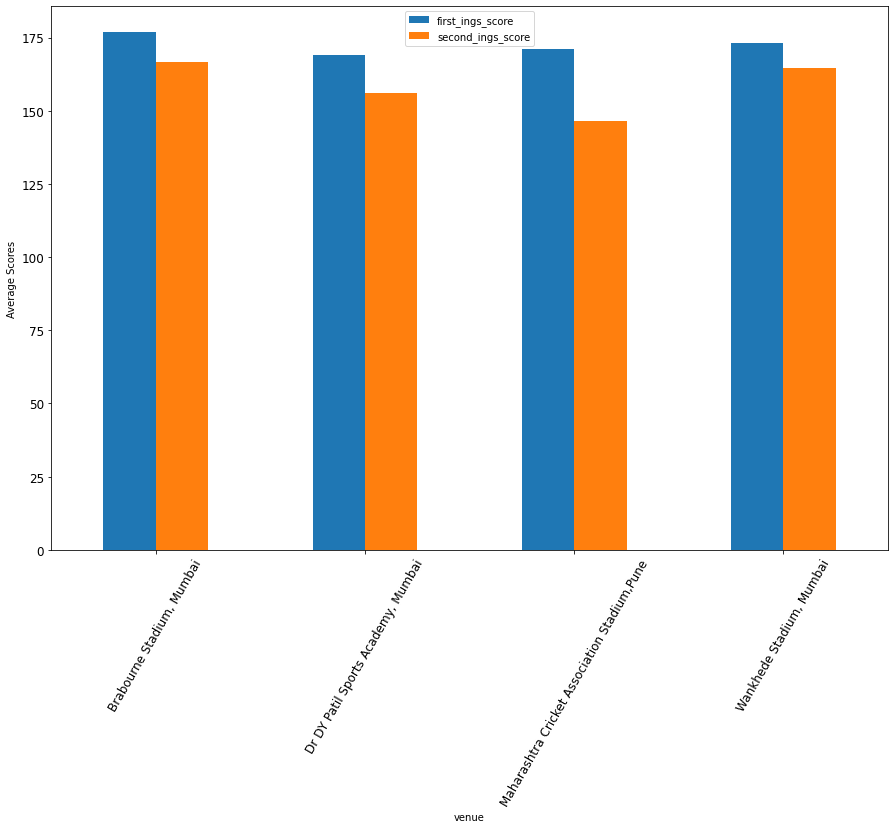

In [122]:
#Plotting average first and second innings scores for each venue

ax = df2.plot.bar(ylabel='Average Scores', rot=60, figsize=(15, 10), fontsize=12)


## Lets find out who has won the most 'Player of the Match' awards

<AxesSubplot:xlabel='Player', ylabel='Player of the Match Count'>

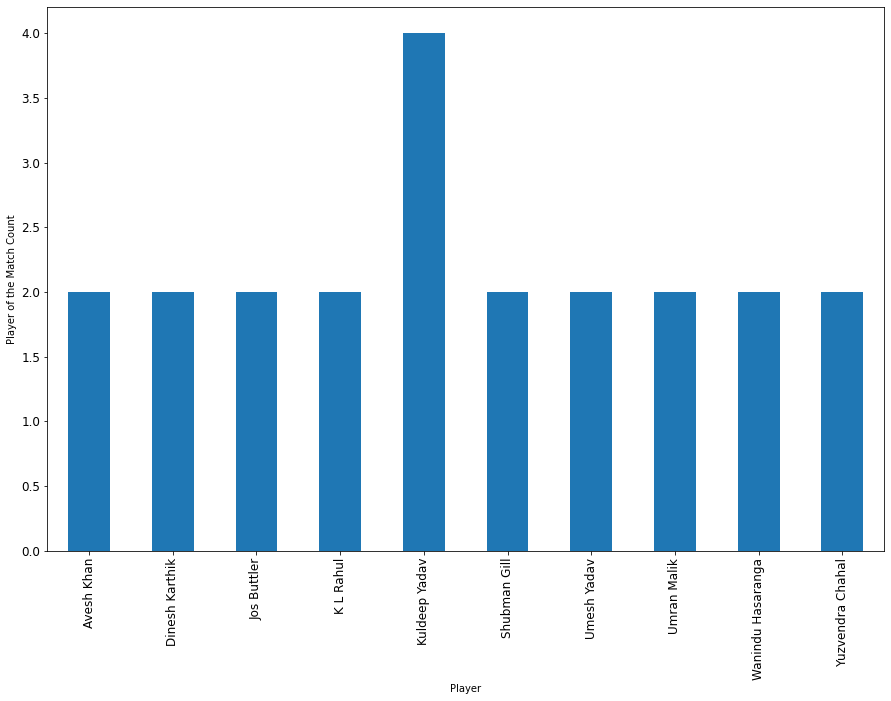

In [173]:
total_PoM = df.pivot_table(index = ['player_of_the_match'], aggfunc ='size') # Total Player of the Matches
total_PoM[total_PoM > 1] # More than one player of the match
total_PoM[total_PoM > 1].plot.bar(xlabel= 'Player', ylabel= 'Player of the Match Count',figsize=(15, 10),fontsize=12, rot = 90)

We find that the player with most 'Player of the Match' is Kuldeep Yadav at 4. The ones with a single player of the match have been excluded from the list.

<AxesSubplot:xlabel='Won By', ylabel='Matches Won'>

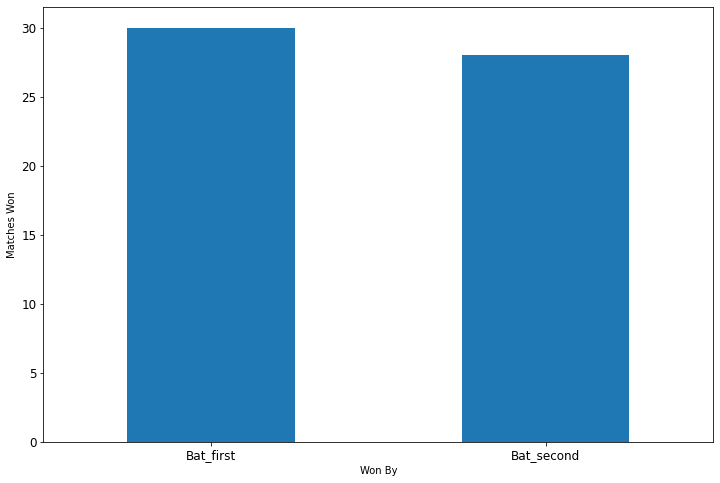

In [183]:
# Number of matches won by teams batting first and second respectively
won_by_calc = df.pivot_table(index = ['won_by'], aggfunc = 'size')

index_new = ['Bat_first', 'Bat_second']
won_by_calc.index = index_new
won_by_calc.plot.bar(xlabel= 'Won By', ylabel= 'Matches Won', figsize=(12, 8), fontsize=12, rot = 0)